In [26]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [15]:
# Step 1: Load the Mall Customer Segmentation Dataset from Kaggle
df = pd.read_csv('Mall_Customers.csv')

In [17]:
# Step 2: Explore the dataset
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [18]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


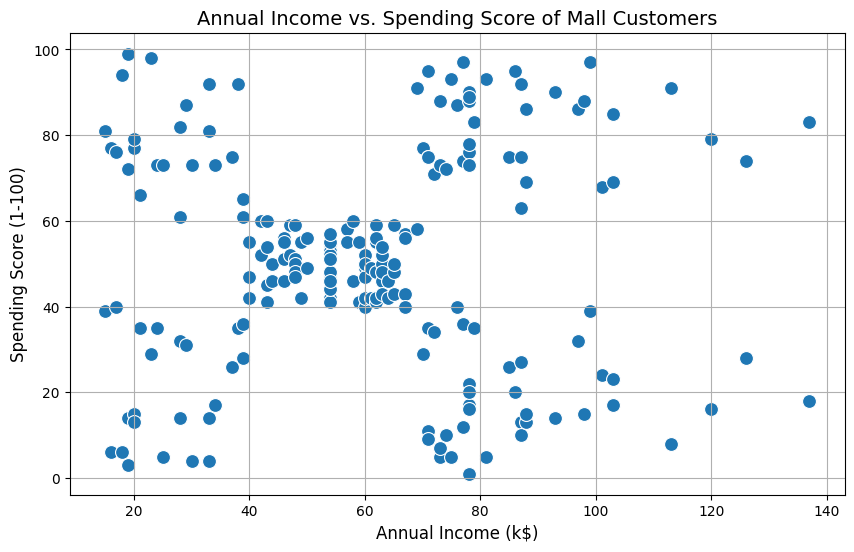

In [28]:
# Create a scatter plot focusing on 'Annual Income (k$)' and 'Spending Score (1-100)'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, s=100)
plt.title('Annual Income vs. Spending Score of Mall Customers', fontsize=14)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.grid(True)
plt.show()

In [19]:
# Step 3: Preprocess the data
# We are using 'Annual Income (k$)' and 'Spending Score (1-100)' for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data for better performance of DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Step 4: Apply DBSCAN clustering
# Set eps and min_samples for DBSCAN
dbscan = DBSCAN(eps=0.35, min_samples=5)
dbscan.fit(X_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = dbscan.labels_

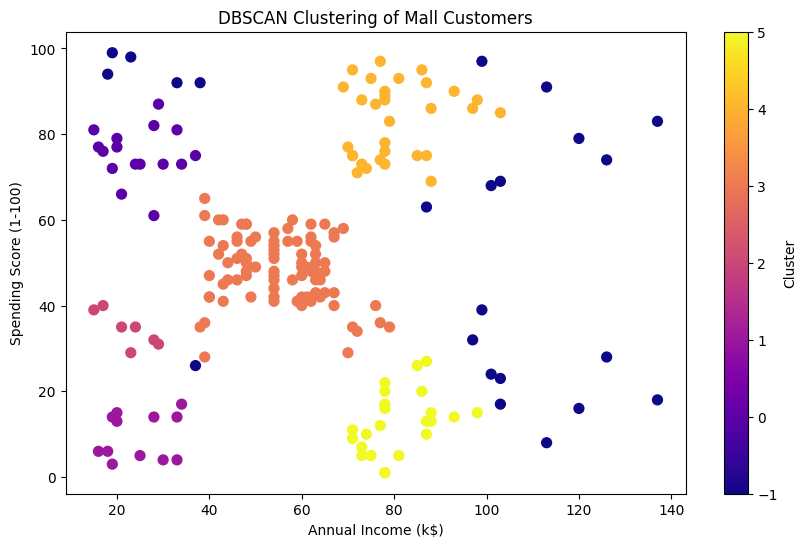

In [21]:
# Step 5: Visualize the DBSCAN clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='plasma', s=50)
plt.title('DBSCAN Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

In [22]:
# Step 6: Analyze the clusters
# Print the number of customers in each cluster
print(df['Cluster'].value_counts())

Cluster
 3    88
 4    31
-1    23
 5    23
 0    16
 1    12
 2     7
Name: count, dtype: int64


In [24]:
# Summarize the cluster characteristics (only for numeric columns)
cluster_means = df.groupby('Cluster').mean(numeric_only=True)[['Annual Income (k$)', 'Spending Score (1-100)']]
print("\nAverage characteristics of each cluster:\n", cluster_means)


Average characteristics of each cluster:
          Annual Income (k$)  Spending Score (1-100)
Cluster                                            
-1                89.260870               57.826087
 0                24.750000               75.375000
 1                24.583333                9.583333
 2                22.428571               34.428571
 3                55.227273               48.579545
 4                80.290323               83.193548
 5                80.956522               12.782609


In [23]:
# Step 7: Detect outliers (labeled as -1)
outliers = df[df['Cluster'] == -1]
print("\nNumber of outliers detected:", len(outliers))
print("\nSample outliers data:\n", outliers.head())


Number of outliers detected: 23

Sample outliers data:
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
7            8  Female   23                  18                      94   
11          12  Female   35                  19                      99   
19          20  Female   35                  23                      98   
33          34    Male   18                  33                      92   
38          39  Female   36                  37                      26   

    Cluster  
7        -1  
11       -1  
19       -1  
33       -1  
38       -1  
